In [ ]:
# load thư viện
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import SGD, RMSprop,Adam
from tensorflow.keras.utils import to_categorical, load_img, img_to_array
from tensorflow.keras.models import load_model
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
train_data = '/content/drive/MyDrive/money'
validation = ImageDataGenerator(rescale=1./255)
valid_data = '/content/drive/MyDrive/money'

In [ ]:
train_dataset = train.flow_from_directory(train_data, target_size = (224,224), batch_size = 10, class_mode = 'categorical')
validation_dataset = validation.flow_from_directory(valid_data, target_size = (224,224), batch_size = 10, class_mode = 'categorical')

Found 248 images belonging to 4 classes.
Found 248 images belonging to 4 classes.


In [ ]:
train_dataset.class_indices

{'00000': 0, '10000': 1, '20000': 2, '50000': 3}

In [ ]:
model = Sequential()
model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3, 3),kernel_initializer='he_uniform', padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu', input_shape=(224, 224, 3)))
model.add(Conv2D(32, (3, 3),kernel_initializer='he_uniform', padding = 'same',  activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(Conv2D(64, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(Conv2D(128, (3, 3), kernel_initializer='he_uniform', padding = 'same', activation = 'relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(4, activation='softmax'))

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_51 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 112, 112, 32)     0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 conv2d_53 (Conv2D)          (None, 112, 112, 32)      9248      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                 

In [ ]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_dataset,batch_size=32,epochs=50,verbose=1,validation_data=validation_dataset)

Epoch 1/50
25/25 [==============================] - 8s 262ms/step - loss: 1.2888 - accuracy: 0.3427 - val_loss: 1.0638 - val_accuracy: 0.5363
Epoch 2/50
25/25 [==============================] - 7s 286ms/step - loss: 1.0328 - accuracy: 0.4677 - val_loss: 0.7762 - val_accuracy: 0.6169
Epoch 3/50
25/25 [==============================] - 7s 280ms/step - loss: 0.8466 - accuracy: 0.5766 - val_loss: 0.7699 - val_accuracy: 0.6008
Epoch 4/50
25/25 [==============================] - 6s 252ms/step - loss: 0.9205 - accuracy: 0.5605 - val_loss: 0.7458 - val_accuracy: 0.6653
Epoch 5/50
25/25 [==============================] - 7s 303ms/step - loss: 1.0177 - accuracy: 0.4637 - val_loss: 0.6952 - val_accuracy: 0.6573
Epoch 6/50
25/25 [==============================] - 7s 277ms/step - loss: 0.8658 - accuracy: 0.6048 - val_loss: 0.8346 - val_accuracy: 0.5524
Epoch 7/50
25/25 [==============================] - 6s 250ms/step - loss: 0.7275 - accuracy: 0.6250 - val_loss: 0.5560 - val_accuracy: 0.6573
Epoch 

In [ ]:
model.save('AI_MONEY_VIETNAMEE.h5')

In [ ]:
money_model = load_model('AI_MONEY_VIETNAMEE.h5')

In [ ]:
score=money_model.evaluate(validation_dataset,verbose=1)
print('loss = ',score[0])
print('accuracy = ',score[1])

25/25 [==============================] - 2s 80ms/step - loss: 0.0132 - accuracy: 0.9960
loss =  0.013179183937609196
accuracy =  0.9959677457809448


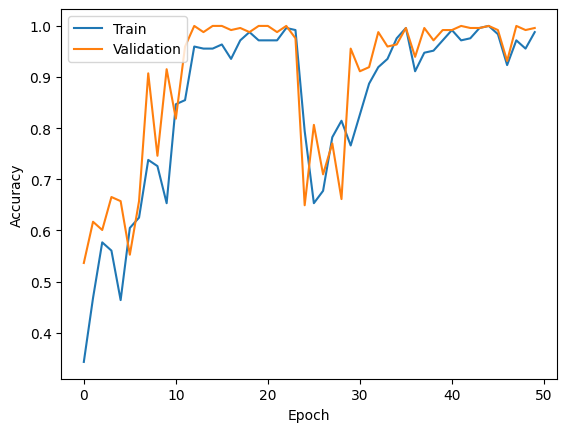

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

1/1 [==============================] - 0s 394ms/step
This picture is:  10000


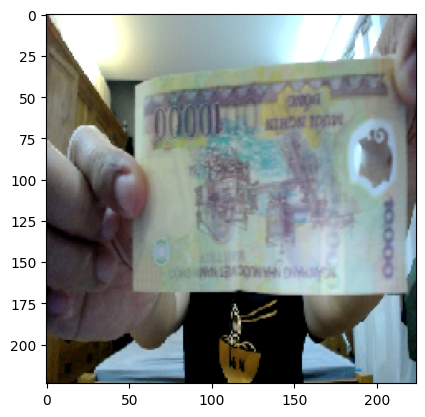

In [ ]:
image = load_img('/content/drive/MyDrive/money/10000/1025.png',target_size=(224,224))
Label = ['00000','10000','20000','50000']
plt.imshow(image)
image = img_to_array(image)
image = image.reshape(1,224,224,3)
image = image.astype('float32')
image = image/255
print('This picture is: ',Label[int(np.argmax(money_model.predict(image),axis=-1))])

1/1 [==============================] - 0s 23ms/step
This picture is:  20000


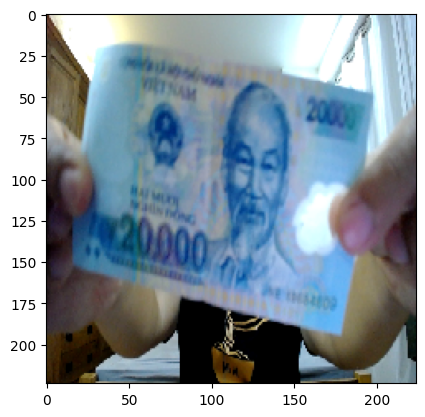

In [ ]:
image = load_img('/content/drive/MyDrive/money/20000/99.png',target_size=(224,224))
Label = ['00000','10000','20000','50000']
plt.imshow(image)
image = img_to_array(image)
image = image.reshape(1,224,224,3)
image = image.astype('float32')
image = image/255
print('This picture is: ',Label[int(np.argmax(money_model.predict(image),axis=-1))])

1/1 [==============================] - 0s 29ms/step
This picture is:  50000


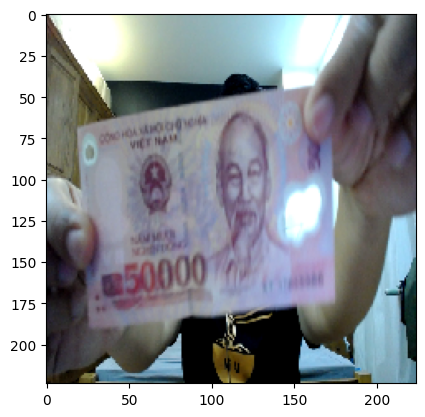

In [ ]:
image = load_img('/content/drive/MyDrive/money/50000/93.png',target_size=(224,224))
Label = ['00000','10000','20000','50000']
plt.imshow(image)
image = img_to_array(image)
image = image.reshape(1,224,224,3)
image = image.astype('float32')
image = image/255
print('This picture is: ',Label[int(np.argmax(money_model.predict(image),axis=-1))])